In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import normalize
from sklearn import metrics

from google.colab import drive

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os   # This module is used for interacting with the operating system. It provides a way to work with files and directories.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# @title Standardtext für Titel
# --- Load raw BRCA data ---
drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/TCGA-BRCA_1079.zip

# --- Prepare labels ---
subtype_labels_frame = pd.read_csv("TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.subtypes_and_signatures_v6.tsv", sep="\t")
subtype_labels = subtype_labels_frame.values
print ("Shape of subtype labels: ", subtype_labels.shape)
print(subtype_labels)

subtype_label_set = set(subtype_labels[:,1])
print(subtype_label_set)

Mounted at /content/gdrive
Archive:  gdrive/MyDrive/TCGA-BRCA_1079.zip
  inflating: TCGA-BRCA_1079.Xena_TCGA_PanCan.annotation_v6.tsv  
  inflating: TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_z_v6.tsv  
  inflating: TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.subtypes_and_signatures_v6.tsv  
Shape of subtype labels:  (1079, 34)
[['TCGA-3C-AAAU-01' 'LumB' 0 ... 2 1 0]
 ['TCGA-3C-AALI-01' 'Her2' 0 ... 3 0 0]
 ['TCGA-3C-AALJ-01' 'LumB' 0 ... 3 0 0]
 ...
 ['TCGA-XX-A89A-01' 'LumA' 0 ... 1 0 0]
 ['TCGA-Z7-A8R5-01' 'LumA' 0 ... 1 0 0]
 ['TCGA-Z7-A8R6-01' 'LumB' 0 ... 3 0 0]]
{'LumA', 'Her2', 'LumB', 'Basal', 'Normal'}


In [3]:
# --- Load data ---
embeddings = np.loadtxt('embeddings.txt')
print(embeddings.shape)

(1079, 10)


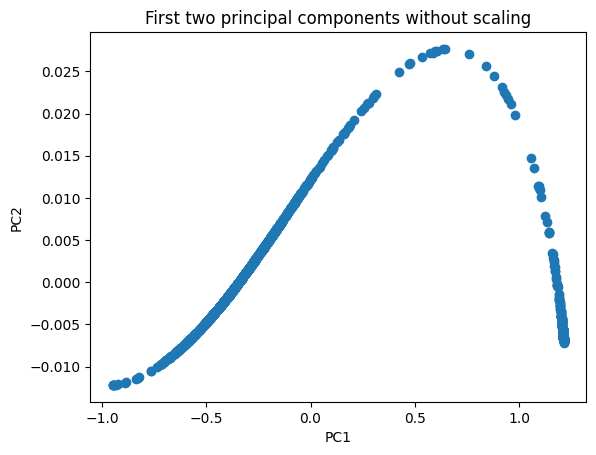

Projected embeddings shape:  (1079, 2)


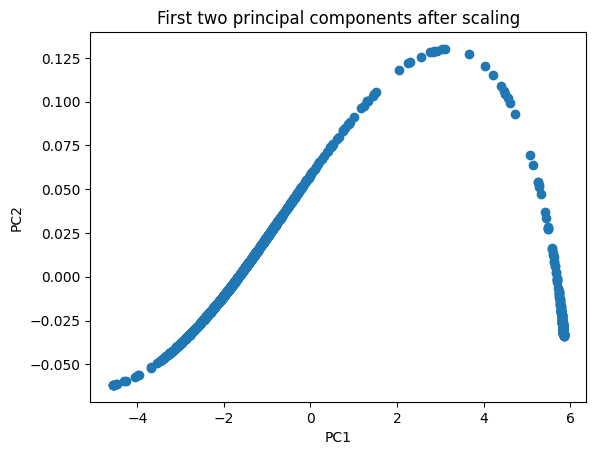

In [4]:
# --- PCA ---
# The selected principal components are used to create a new subspace.
# The original data is then projected onto this subspace, resulting in a lower-dimensional representation of the data.

# Plot the first two principal components without scaler
pca = PCA()
Xt = pca.fit_transform(embeddings)
plot = plt.scatter(Xt[:,0], Xt[:,1])
# ':' before the comma ',' indicates that we want elements from all rows
# '1' indicates that we want to include the second column
# => It returns a 1D array with the values of the second column
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components without scaling")
plt.show()

# --- Plot the first two principal components with scaling ---
# PCA is sensitive to the scale of the features
# If the features are on different scales, features with larger scales will contribute more to the principal components.
# Scaling is typically done by dividing the values for a feature j by the standard deviation of this feature amongst the dataset
# It is important to center data before performing PCA since the transformation relies on the data being around the origin.
std_scaler = StandardScaler(with_mean=True) # Standardize the dataset features so that each feature has mean=0 and standard_deviation=1
scaled_embeddings = std_scaler.fit_transform(embeddings)
pca = PCA(n_components=2)
projected_embeddings = pca.fit_transform(scaled_embeddings)
print("Projected embeddings shape: ", projected_embeddings.shape)
plot = plt.scatter(projected_embeddings[:,0], projected_embeddings[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

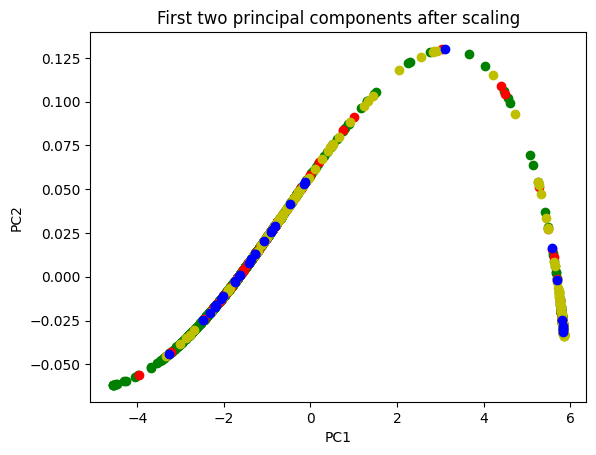

In [5]:
# Create arrays containing the projected points (a point is a 1D-array) for each cluster
her_2 = []
lum = []
basal = []
normal = []
for i in range(len(subtype_labels)):
  if (subtype_labels[i][1] == "Her2"):
    her_2.append(projected_embeddings[i,:])
  elif (subtype_labels[i][1] == "LumA" or subtype_labels[i][1] == "LumB"):
    lum.append(projected_embeddings[i,:])
  elif (subtype_labels[i][1] == "Basal"):
    basal.append(projected_embeddings[i,:])
  elif (subtype_labels[i][1] == "Normal"):
    normal.append(projected_embeddings[i,:])
# Convert lists to (2D-)arrays
her_2 = np.array(her_2)
lum = np.array(lum)
basal = np.array(basal)
normal = np.array(normal)

plot = plt.scatter(lum[:,0], lum[:,1], color='g')
plot = plt.scatter(her_2[:,0], her_2[:,1], color='r')
plot = plt.scatter(basal[:,0], basal[:,1], color='y')
plot = plt.scatter(normal[:,0], normal[:,1], color='b')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()